In [424]:
import pandas as pd
import numpy as np
from collections import Counter

import seaborn as sns
import matplotlib.pyplot as plt

from numba import njit

In [425]:
df = pd.read_csv(r'D:\Ass\AI_Lab\AI_Proj_Phase2\ADF_Encode.csv')
df = df.drop('Filename',axis=1)
df

,Pitch,Formant1,Formant2,Formant3,Intensity,Duration,Spectral Centroid,age,gender,accent
0,1266.03450,251.054775,840.543750,1905.137294,0.006549,5.832,2147.605880,20,0.0,1.0
1,1629.07790,0.000000,0.000000,520.699438,0.013888,1.728,2815.325442,70,1.0,1.0
2,1681.26670,0.000000,676.308535,1480.648180,0.035668,4.224,1844.637736,30,0.0,1.0
3,954.41925,231.033686,460.115363,1606.665429,0.031007,5.376,2123.711333,60,1.0,3.0
4,1005.09410,252.753530,858.042035,1663.751843,0.043531,3.720,2360.672044,50,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...
5610,1284.48500,276.863670,832.535029,1724.024575,0.013427,7.464,3138.407455,40,1.0,1.0
5611,1621.85130,0.000000,473.155354,1456.991673,0.022652,6.696,3812.367533,30,0.0,4.0
5612,1669.43400,380.328398,1040.112372,1790.230782,0.072386,3.024,2469.731797,30,1.0,1.0
5613,1182.86620,0.000000,487.460137,1666.970758,0.069570,4.704,3715.842500,40,1.0,10.0


In [426]:


# Calculate the mode of the 'gender' column
mode_gender = df['gender'].mode().iloc[0]
# print(mode_gender)

df['gender'] = df['gender'].fillna(mode_gender)

df['accent'] = df['accent'].fillna(0)
df['Intensity'] = df['Intensity'] * 10000

df.isnull().sum()


Pitch                0
Formant1             0
Formant2             0
Formant3             0
Intensity            0
Duration             0
Spectral Centroid    0
age                  0
gender               0
accent               0
dtype: int64

In [427]:
df.reset_index(drop=True, inplace=True)

In [428]:
for Col in df.columns:
    df[Col] = df[Col].astype(int)
df

,Pitch,Formant1,Formant2,Formant3,Intensity,Duration,Spectral Centroid,age,gender,accent
0,1266,251,840,1905,65,5,2147,20,0,1
1,1629,0,0,520,138,1,2815,70,1,1
2,1681,0,676,1480,356,4,1844,30,0,1
3,954,231,460,1606,310,5,2123,60,1,3
4,1005,252,858,1663,435,3,2360,50,1,2
...,...,...,...,...,...,...,...,...,...,...
5610,1284,276,832,1724,134,7,3138,40,1,1
5611,1621,0,473,1456,226,6,3812,30,0,4
5612,1669,380,1040,1790,723,3,2469,30,1,1
5613,1182,0,487,1666,695,4,3715,40,1,10


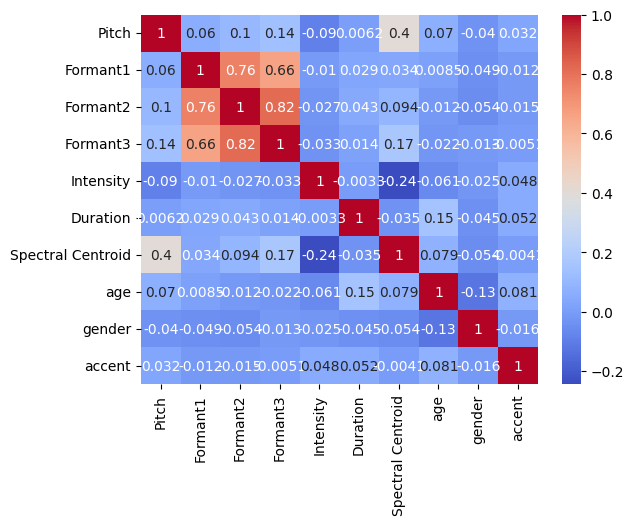

In [429]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [430]:

TotalSamples = df[df['gender'].notna()]
TotalSamples = TotalSamples[TotalSamples['accent'].notna()]


# # --------------------------Train Data --------------------------
# TotalTrain = int(len(TotalSamples) * 0.6)
# TotalTrain
# TrainSamples = TotalSamples[:TotalTrain]
# TrainSamplesX = TrainSamples[ ['Pitch', 'Formant1', 'Formant2', 'Formant3', 'Intensity', 'Duration', 'Spectral Centroid', "gender", 'accent']]
# TrainSamplesY = TrainSamples['age']


# # --------------------------Test Data --------------------------
# Test = TotalSamples[TotalTrain:]
# TestX = Test[ ['Pitch', 'Formant1', 'Formant2', 'Formant3', 'Intensity', 'Duration', 'Spectral Centroid', "gender", 'accent']]
# TestY = Test['age']




In [522]:
# from graphviz import Digraph
# import numpy as np
# from collections import Counter
# from numba import njit

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None, FeatureName=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
        self.FeatureName = FeatureName

    def is_leaf_node(self):
        return self.value is not None
    

In [657]:

class DecisionTree:
    def __init__(self, max_depth):
        self.root = None
        self.max_depth = max_depth

    def train(self, dataX, AgeGroup, Name):
        AllInfos = set()
        num_features = dataX.shape[1]
        for feature_idx in range(num_features):
            Info = self.informationGain(AgeGroup, dataX[:, feature_idx])
            AllInfos.add((feature_idx, Info))

        AllInfos = sorted(AllInfos, key=lambda x: x[1], reverse=True)
        self.root = self.grow(dataX, AgeGroup, AllInfos, Name)

    def grow(self, dataX, AgeGroup, AllFeatures, FeaturesName, depth=0):

        unique_ages = np.unique(AgeGroup)
        # print(len(unique_ages), unique_ages)
        
        if len(unique_ages) == 1:
            # print("predition is",unique_ages)
            return Node(value=unique_ages[0])
            
        if len(AllFeatures) == 0 :
            most_common_age = np.bincount(AgeGroup).argmax()
            # print("Womp Womp",most_common_age)
            return Node(value=most_common_age)

        BestFeature = AllFeatures[0]
        SplitValue, Left, Right = best_threshold(dataX, AgeGroup, dataX[:, BestFeature[0]])

        if len(Left) == 0 or len(Right) == 0 or len(AllFeatures) == 0 :
            most_common_age = np.bincount(AgeGroup).argmax()
            return Node(value=most_common_age)

        AllFeatures = [f for f in AllFeatures if f != BestFeature]

        left = self.grow(dataX[Left], AgeGroup[Left], AllFeatures, FeaturesName, depth + 1)
        right = self.grow(dataX[Right], AgeGroup[Right], AllFeatures, FeaturesName, depth + 1)

# None, None, None, None, 
        return Node(feature=BestFeature[0], threshold = SplitValue, left = left, right = right, FeatureName=FeaturesName[BestFeature[0]])

    def informationGain(self, AgeGroup, attribute):
        total_samples = len(AgeGroup)

        age_counts = Counter(AgeGroup)
        WholeEntropy = 0.0
        for count in age_counts.values():
            probability = count / total_samples
            WholeEntropy -= probability * np.log2(probability)

        EachEntropy = entropy(attribute, AgeGroup)
        InformationGain = WholeEntropy - EachEntropy
        return InformationGain
    
    
    

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        # print('should be list',x[node.feature])
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            # print('go left',x[node.feature],  node.threshold)
            return self._traverse_tree(x, node.left)
        
        # print('go right',x[node.feature],  node.threshold)
        return self._traverse_tree(x, node.right)

    def visualize_tree(self, filename='decision_tree'):
        dot = Digraph()

        def add_nodes_edges(node, dot=None):
            if dot is None:
                dot = Digraph()

            dot.node(str(id(node)), label=str(node.FeatureName))

            if node.left and node.right:
                if node.left.value != None:
                    print(node.FeatureName, 'left', node.left.value)
                    print(node.FeatureName, 'right', node.right.value)
            if node.left:
                dot.node(str(id(node.left)), label=str(node.left.value) if node.left.value else str(node.left.FeatureName))
                # dot.node(str(id(node.left)), label=str(node.left.value))
                dot.edge(str(id(node)), str(id(node.left)), label='<= {:.2f}'.format(node.threshold))
                dot = add_nodes_edges(node.left, dot)

            if node.right:
                dot.node(str(id(node.right)), label=str(node.right.value)) if node.right.value else str(node.right.FeatureName)
                dot.edge(str(id(node)), str(id(node.right)), label='> {:.2f}'.format(node.threshold))
                dot = add_nodes_edges(node.right, dot)

            return dot

        dot = add_nodes_edges(self.root)
        dot.render(filename, format='png', cleanup=True)

@njit
def entropy(attribute, AgeGroup):
    Total = len(attribute)
    max_attr_value = np.max(attribute)
    max_age_value = np.max(AgeGroup)

    Ages = np.zeros((max_attr_value + 1, max_age_value + 1))

    for index in range(Total):
        attr_value = attribute[index]
        age_value = AgeGroup[index]

        Ages[attr_value, age_value] += 1

    entropy = 0.0
    for value_counts in Ages:
        AttributeWeight = value_counts.sum()
        EachEntropy = 0.0
        for count in value_counts:
            if count > 0:
                probability = count / AttributeWeight
                EachEntropy -= probability * np.log2(probability)
        entropy += (AttributeWeight / Total) * EachEntropy
    return entropy

@njit
def best_threshold(dataX, AgeGroup, Feature):
    all_thresholds = np.unique(Feature)
    best_gain = -np.inf
    best_threshold_value = 0
    total = len(dataX)

    current_entropy = entropy(Feature, AgeGroup)

    for threshold in all_thresholds:
        left_mask = Feature <= threshold
        right_mask = ~left_mask

        left_age = AgeGroup[left_mask]
        right_age = AgeGroup[right_mask]

        if len(left_age) == 0 or len(right_age) == 0:
            continue

        left_entropy = entropy(Feature[left_mask], left_age)
        right_entropy = entropy(Feature[right_mask], right_age)

        weighted_entropy = (len(left_age) / total) * left_entropy + (len(right_age) / total) * right_entropy
        info_gain = current_entropy - weighted_entropy

        if info_gain > best_gain:
            best_gain = info_gain
            best_threshold_value = threshold

    LeftIndices = np.where(Feature <= best_threshold_value)[0]
    RightIndices = np.where(Feature > best_threshold_value)[0]

    return best_threshold_value, LeftIndices, RightIndices

# Example usage:
# Assuming dataX, AgeGroup, and Name are defined and DecisionTree instance is created
# tree = DecisionTree(max_depth=5)
# tree.train(dataX, AgeGroup, Name)
# tree.visualize_tree()

In [658]:


# Train Data
TotalTrain = int(len(TotalSamples) * 0.7)
TrainSamples = TotalSamples[:TotalTrain]
TrainSamplesX = TrainSamples[['Pitch', 'Formant1', 'Formant2', 'Formant3', 'Intensity', 'Duration', 'Spectral Centroid', 'gender', 'accent']]
TrainSamplesY = TrainSamples['age']

# Test Data
Test = TotalSamples[TotalTrain:]
TestX = Test[['Pitch', 'Formant1', 'Formant2', 'Formant3', 'Intensity', 'Duration', 'Spectral Centroid', 'gender', 'accent']]
TestY = Test['age']

# Convert to NumPy arrays for Numba compatibility
TrainSamplesX_np = TrainSamplesX.values
TrainSamplesY_np = TrainSamplesY.values
TestX_np = TestX.values
TestY_np = TestY.values

# print(TrainSamplesX_np)

FeatNames = ['Pitch', 'Formant1', 'Formant2', 'Formant3', 'Intensity', 'Duration', 'Spectral Centroid', 'gender', 'accent']


# Train the model
tree = DecisionTree(8)
tree.train(TrainSamplesX_np, TrainSamplesY_np, FeatNames)



In [659]:

predictions = tree.predict(TestX_np)
tree.visualize_tree()

Pitch left 20
Pitch right None
Intensity left 30
Intensity right 40
Pitch left 20
Pitch right None
gender left 50
gender right 20
gender left 30
gender right 20
Duration left 30
Duration right None
gender left 20
gender right 30
accent left 40
accent right 30
Duration left 20
Duration right None
gender left 40
gender right 20
Duration left 30
Duration right 50
gender left 50
gender right 20
gender left 20
gender right 20
Duration left 30
Duration right None
gender left 20
gender right 30
accent left 40
accent right None
Duration left 40
Duration right None
gender left 50
gender right 20
Formant1 left 20
Formant1 right None
accent left 20
accent right None
gender left 30
gender right 20
gender left 50
gender right 20
Intensity left 20
Intensity right None
Formant2 left 20
Formant2 right 30
Formant2 left 30
Formant2 right 70
Formant2 left 20
Formant2 right 20
Intensity left 30
Intensity right None
Formant2 left 50
Formant2 right None
Duration left 40
Duration right 20
Duration left 20
Du

In [663]:
# print('Actual', '  ', 'Predicted')

# for i,j in zip(predictions,TestY_np):
#     print('  ', j, '   ',i )

In [628]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Example data (replace with your actual and predicted values)
actual_values = TestY_np  # Replace with your actual data (age groups)
predicted_values = predictions# Replace with your predicted data (age groups)

# Calculate precision, recall, F1 score, and accuracy
prec = precision_score(actual_values, predicted_values, average='weighted', zero_division=0)
rec = recall_score(actual_values, predicted_values, average='weighted')
f1 = f1_score(actual_values, predicted_values, average='weighted')
acc = accuracy_score(actual_values, predicted_values)


# Print results
print(f'Precision: {prec:.2f}')
print(f'Recall: {rec:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'Accuracy: {acc:.2f}')
# print('total', len(TestY_np), 'wrong', ((wrong * 100)/ len(TestY_np)))

Precision: 0.27
Recall: 0.33
F1 Score: 0.24
Accuracy: 0.33


In [643]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# # Load dataset (replace with your own data loading code)
# diabetes = load_diabetes()
# X = diabetes.data  # Features
# y = diabetes.target  # Target variable (continuous)

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Decision Tree Regressor
regressor = DecisionTreeRegressor()

TrainSamplesX_np = TrainSamplesX.values
TrainSamplesY_np = TrainSamplesY.values
TestX_np = TestX.values
TestY_np = TestY.values

regressor.fit(TrainSamplesX, TrainSamplesY)

# Predict on the test set
y_pred = regressor.predict(TestX)

# Calculate MSE
mse = mean_squared_error(TestY, y_pred)
print(f'Mean Squared Error: {mse:.2f}')


mse = mean_squared_error(TestY_np, predictions)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 321.31
Mean Squared Error: 342.73
